<a href="https://colab.research.google.com/github/jedrzejwalega/Machine-Learning-Clustering-and-Classification-Fundamentals/blob/main/ML_clustering_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering and Classification Methods** - Basics, Strengths and Weaknesses



**Clustering** and **classification** are some of the most fundamental tasks in machine learning and are closely tied to each other. Clustering is performed on unlabeled data and tries to find similarities between data points to cluster them together into groups (for example based on some distance metric). Classification addresses a similar challenge, although this time we're dealing with labeled data. We talk of classification when, based on the labeled dataset, we try to classify a new, unlabeled observation.

Underneath is an introduction to a few most popular and fundamental techniques used in ML when dealing with those two tasks. They are hardly the most sophisticated methods, but are good to know - they are often surprisingly effective and even if not, are a good spring board towards more advanced approaches.

##**K-Means**

K-Means is probably the simplest clustering algorithm. It's an unsupervised learning algorithm, so it tries to find patterns in unlabeled data. To be precise, it tries to divide the data points in our dataset into clearly separate groups (or "clusters"). Each data point is represented by a vector of length of at least 1.

An important parameter of the clusters we create is the centroid - the center point of the cluster. The algorithm will try to minimize the sum of squared distances between data points and their assigned centroids:

$$ \text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$

###**Steps**
K-Means follows the following logic:


1.   We initialize the algorithm by picking centroids at random coordinates. We also have to decide how many of those centroids will be created.
2.   We assign our data points to the centroids they are closest to (judging by Euclidean distance).
3.   With data points assigned, let's try to improve on the centroid location. We calculate the mean point in each cluster, based on the member data points. This point should be relatively close, on average, to the points in the cluster, so we make it our new centroid.
4.   With new centroids set, let's reassign the data points. The centroids have moved after all, so some data points may now be closer to other clusters.
5.   We repeat those steps until our groups converge.

###**Convergence**
How do we determine that the algorithm has converged? A widely used metric is inertia or within-cluster sum of squares (WCSS), which is just a sum of squared Euclidan distances of all the data points in the dataset:

$$ \text{WCSS} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} ||x_j - c_i||^2 $$
Where:
- k is the number of clusters.
- n<sub>i</sub> is the number of data points in cluster i.
- x<sub>j</sub> is a data point.
- c<sub>i</sub> is the centroid of cluster i.
- ||x<sub>j</sub> - c<sub>i</sub>||<sup>2</sup>represents the squared Euclidean distance between a data point and its assigned centroid.

If ingertia changes minimally between the iterations, we can say that the algorithm has converged. Alternative ways of assessing convergance is to track the movement of centroids - if they've stopped moving on a large scale, we can also say we've reached a convergence. Third method is to track the stability of the silhouette score, which is a metric that measures the cohesion in the cluster (how concentrated points are around the centroid) and separation between clusters.

###**Strengths**
1. Efficient - Not demanding in computing power, which comes in handy with large datasets.
2. Scalable - Works well with high-dimensional data (long vectors).

###**Weaknesses**
1. **Spherical clusters** - Since at each iteration we're moving the centroids to the mean point in the cluster, their shapes will resemble spheres. Real world data may require more abstract cluster shapes than that.
2. Sensitive to initial points - Results may vary depending on where you initialize the centroids.
3. Sensitive to number of clusters - You need to specify the number of centroids you want and finding the proper number can be a challenge.
4. Sensitive to outliers - Outliers in the data can be falsely attributed to a given cluster, disrupting the centroid. If they're present in the dataset, preprocessing is necessary.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


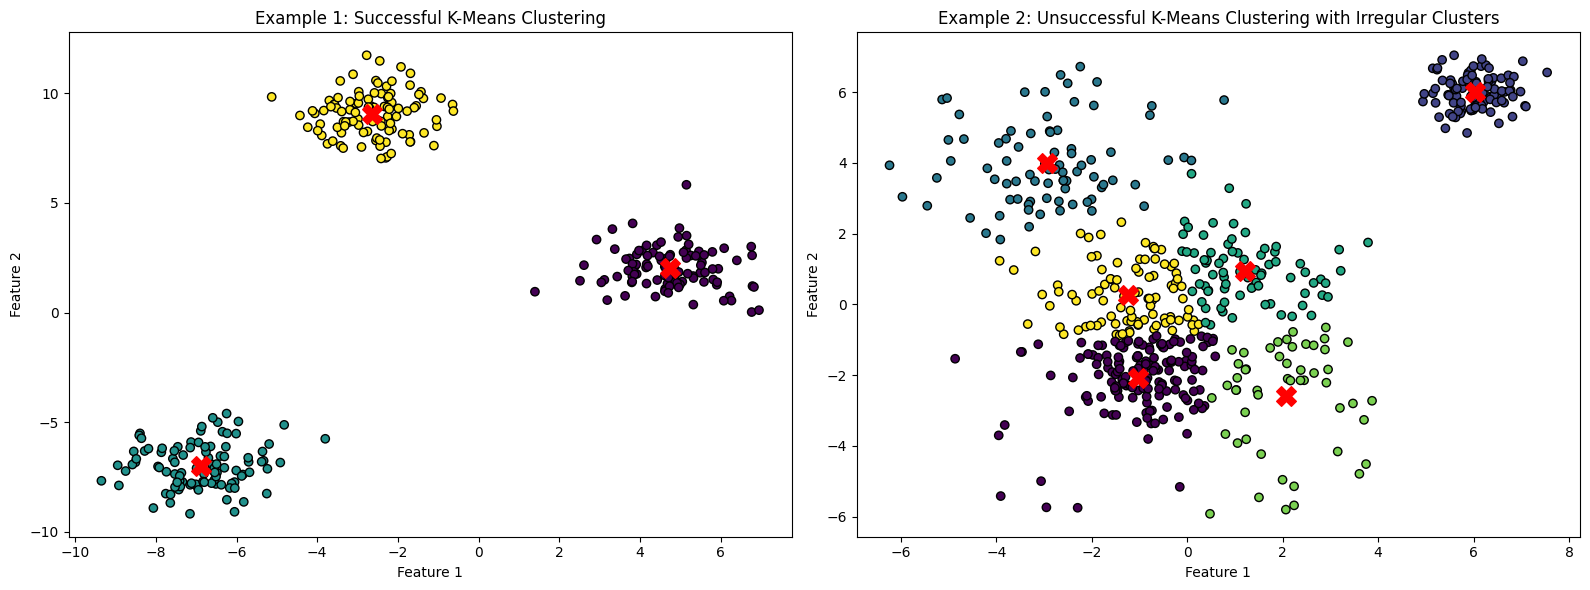

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(42)

# Generate data with round clusters
data_a, labels_a = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply K-Means clustering to round cluster data
kmeans_a = KMeans(n_clusters=3, random_state=42)
kmeans_a.fit(data_a)

# Generate data with irregular clusters
data_irregular = np.concatenate([
    np.random.randn(150, 2) * 1.5,
    np.random.randn(100, 2) * 0.5 + np.array([6, 6]),
    np.random.randn(80, 2) * 1.2 + np.array([-3, 4]),
    np.random.randn(120, 2) * 0.8 + np.array([-1, -2]),
    np.random.rand(60, 2) * 8 - np.array([4, 6]),
    np.random.rand(50, 2) * 4 - np.array([1, 2]),
])

# Apply K-Means clustering to irregular cluster data
k_means_irregular = KMeans(n_clusters=6, random_state=42)
k_means_irregular.fit(data_irregular)

# Visualize the clustering
plt.figure(figsize=(16, 6))

# Example 1: Successful K-Means Clustering with round clusters
plt.subplot(1, 2, 1)
plt.scatter(data_a[:, 0], data_a[:, 1], c=kmeans_a.labels_, cmap='viridis', edgecolors='k')
plt.scatter(kmeans_a.cluster_centers_[:, 0], kmeans_a.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('Example 1: Successful K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Example 2: Unsuccessful K-Means Clustering with irregular clusters
plt.subplot(1, 2, 2)
plt.scatter(data_irregular[:, 0], data_irregular[:, 1], c=k_means_irregular.labels_, cmap='viridis', edgecolors='k')
plt.scatter(k_means_irregular.cluster_centers_[:, 0], k_means_irregular.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('Example 2: Unsuccessful K-Means Clustering with Irregular Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

Example 1 shows clearly defined, roughly spherical clusters. In Example 2 the clusters are irregular and spread out (except the one in the top right, which looks correct). The centroid of the light green cluster is visibly misplaced from the center of the blob, suggesting the impact of outliers. Silhouette score and Davis-Bouldin index are two ways of assessing the quality of the clusters in a numeric way.

### **Real Life Example**

Imagine you have a dataset of customer information, including purchase history. K-Means clustering can help group customers based on similarities in their purchasing behavior. This can assist businesses in targeted marketing to different customer segments. Before using K-Means you should make sure that the customer data forms clearly defined, roughly spherical blobs.

## **Hierarchical Clustering**

Another unsupervised ML clustering method is hierarchical clustering. It allows us to build a tree, representing not only clusters, but also the order of similarity between them.

### **Steps**

Hierarchical clustering follows the following logic:

1. We calculate a matrix of Euclidean distances between all data points.
2. At first, we treat all of our data points as separate clusters.
3. We calculate the distance between clusters. At first this is the our matrix from earlier, but later on, when our clusters become bigger, it will differ. We define a separate metric for cluster distance, which will influence the shape of our clusters. The popular choices are:
  - Single Linkage: Distance between two clusters is defined by the minimum distance between any two points in the clusters. Tends to form elongated clusters.
  - Complete Linkage: Distance is defined by the maximum distance between any two points in the clusters. Tends to form compact, spherical clusters.
  - Average Linkage: Distance is defined by the average distance between all pairs of points in the clusters and falls in between with the shape.
4. Based on pairwise cluster distances, we merge the two closest ones.
5. Repeat until we get a single cluster.

### **Strengths**
1. Cluster hierarchy - The lengths of the tree branches represent how big is the distance between the clusters, providing additional information in interpreting the output.
2. Complex shapes of clusters - Various linkage types allow for creation of non-spherical clusters, unlike the K-Means method.
3. No assumption on cluster number - Unlike K-Means, we don't have to manually pick the number of clusters we want.

### **Weaknesses**
1. **Computationally expensive** - High computational complexity and memory demand. Tough on large datasets - can reach O(n<sup>3</sup>) complexity, so prepare yourself a big coffee and triple check your memory availability.
2. Sensitive to outliers - Outliers can heavily impact formation of the clusters.




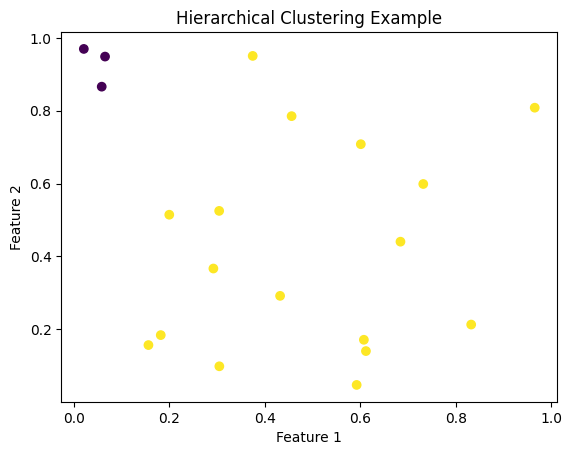

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate synthetic data, let's say 20 examples of data points, consisting of 2-variable long vectors
np.random.seed(42)
data = np.random.rand(20, 2)

# Perform hierarchical clustering with average linkage
tree = linkage(data, method='average')

# Cut the dendrogram to obtain clusters at a specific level - since we're not interested in final, single cluster, let's pick the two biggest ones
threshold = 0.7
clusters = fcluster(tree, t=threshold, criterion='distance')

# Visualize the data points with colors representing the chosen clusters
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### **Real Life Example**

Imagine that you're working with biological data (DNA sequences) representing different species. Based on those sequences you want to find out the order of their evolution. You could use hierarchical clustering (or one of its many variants) to find out the distances between clusters of sequences and create an evolutionary tree.


## **K-Nearest Neighbors**

Time for a supervised ML algorithm - K-Nearest Neighbors. Supervised means that we are provided not only with a dataset of observations, but also the associated labels. Similarly to K-Means, this is a really simple approach, revolving around the idea that when we try have a new observations, we should look at similar observations from out dataset and assign a label based on them.

### **Steps**

Nearest Neighbors algorithm follows the following logic:
1. Pick parameter k - number of nearest neighbors considered when labeling a new observation
2. Add a new observation (a data point without a label) and calculate Euclidean distances between this point and the labeled data points in the dataset.
3. Pick k points from the dataset that are the closest to the new observation.
4. The label that occurs most frequently among nearest neighbors becomes the new observation's label.

### **Strengths**
1. Complex shapes of clusters - Can adapt well to non-linear decision boundaries.

### **Weaknesses**
1. **Computationally expensive** - For every prediction, you need to calculate Euclidean distance in regards to every data point in the dataset. On large datasets this can be rather slow.
2. Sensitive to outliers - A classic weakness of most vanilla clustering algorithms. Outliers can sometimes become a nearest neighbor of a new observation, skewing the labeling process.




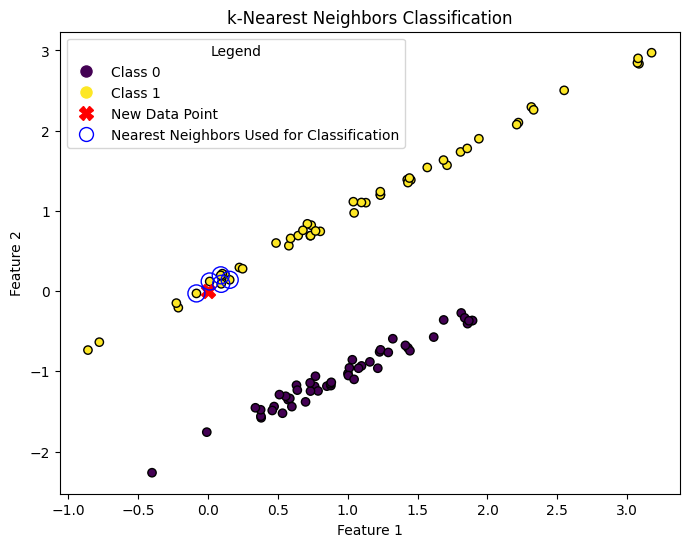

The predicted class for the new data point is: 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Generate synthetic data with two classes and a point we want to classify
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
new_data_point = np.array([[0, 0]])

# Fit k-Nearest Neighbors classifier, let's pick k = 5
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X, y)

# Predict the class of the new data point
predicted_class = knn_classifier.predict(new_data_point)

# Plot the original dataset and new data point
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', label='Original Data')
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], c='red', marker='X', s=100, label='New Data Point')

# Highlight the neighbors used for classification
distances, indices = knn_classifier.kneighbors(new_data_point)
neighbor_scatter = plt.scatter(X[indices, 0], X[indices, 1], facecolors='none', edgecolors='blue', linewidths=1, s=150, label='Neighbors')

plt.title('k-Nearest Neighbors Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Adjust the legend to showcase original data, classified observation and the nearest neighbors picked for labeling
legend_labels = {0: 'Class 0', 1: 'Class 1', 'new_data': 'New Data Point', 'neighbors': 'Nearest Neighbors Used for Classification'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(c)), markersize=10, label=legend_labels[c]) for c in np.unique(y)]
handles.extend([plt.Line2D([0], [0], marker='X', color='red', linestyle='None', markersize=10, label=legend_labels['new_data']),
                plt.Line2D([0], [0], marker='o', color='blue', linestyle='None', markersize=10, markerfacecolor='none', label=legend_labels['neighbors'])])
plt.legend(handles=handles, title='Legend')

plt.show()

print(f"The predicted class for the new data point is: {predicted_class[0]}")

### **Real Life Example**

You have a dataset of handwritten digits, and you want to identify the digit for a new handwritten image. These days such tasks are handled but neural nets, but KNN is a lightweight alternative. KNN can be used for this task by finding the k-nearest neighbors from the dataset to the new image and assigning the digit that appears most frequently among those neighbors.